# 3. Sale price prediction
The aim of this part is to predict the sale price of houses as accurately as possible with a multivariate linear regression. 

## Preparations
Import required libaries and load fitted and cleaned data from first notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

from datetime import datetime, date, time, timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
from scipy import stats 
import statsmodels.api as sms
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
df = pd.read_csv('data/df_cleaned.csv')

## Split dataframe into test and train set
We do not yet know the true sales price until the house has been successfully sold. In order to test the model before applying on new and unknown data we have to split the data into a train and test dataset. During building the model I only work with the train dataset and keep the other part untouched. Later on the test set is then used to compare the results of the model (predicted prices) with the true sales prices and gives indication how well the model determines the true prices. 
To separate the dataset into training and testing data, we use a feature of Scikit-Learn: Train-Test-Split. 

In [3]:
# remove columns because they do not provide prognostic information
df.drop(['sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'long', 'yr_sale', 
         'mo_sale', 'sqft_price', 'sqft_lot_price'], axis=1, inplace=True)

In [4]:
# define descriptive variables
all_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
                'condition', 'grade', 'yr_built', 'zipcode', 'sqft_living15', 'sqft_lot15', 'renovated', 'basement']

# X contains all descriptive variables defined above
X = df[all_features]

# y contains price
y = df.price

In [6]:
# split data into train and test data
# 25 % of the data is used for the subsequent testing of the prognostic quality
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
# we can look at how much data is in each dataset
print("X_train (features for the model to learn from): ", X_train.shape)
print("y_train (labels for the model to learn from): ", y_train.shape)
print("X_test (features to test the model's accuracy against): ", X_test.shape)
print("y_test (labels to test the model's accuracy with): ", y_test.shape)

X_train (features for the model to learn from):  (16197, 15)
y_train (labels for the model to learn from):  (16197,)
X_test (features to test the model's accuracy against):  (5399, 15)
y_test (labels to test the model's accuracy with):  (5399,)


## Correlations with price
To get an idea which features are most interesting for the model, we take another look at the Pearson correlation coefficients

In [8]:
# combine X_train and y_train again to use only the training set
X_training = X_train.merge(y_train, left_index=True, right_index=True)

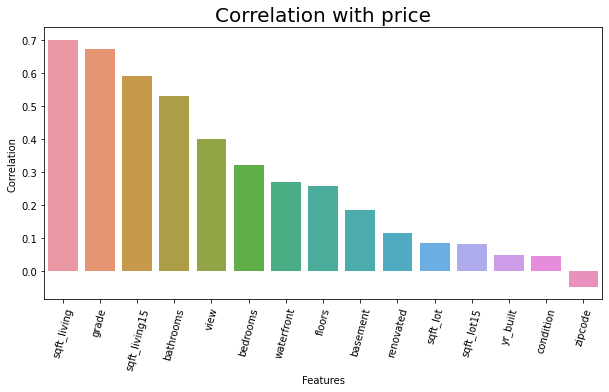

In [9]:
corr_price = X_training.corrwith(X_training.price).sort_values(ascending=False)
corr_price = corr_price[1:] # exclude price

# plot correlation with price
fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(x=corr_price.index, y=corr_price);
plt.xticks(rotation='75');
ax.set_ylabel('Correlation')
ax.set_xlabel('Features')
ax.set_title('Correlation with price', fontsize = 20);

## Multiple Linear Regression

In [32]:
# determine the model
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()

In [33]:
# training of the model
# first model with all features
model1.fit(X_train, y_train)

# second model with features with a correlation higher than 0.5
# determine variables to pass into the model
features2 = ['sqft_living', 'grade', 'sqft_living15', 'bathrooms']
model2.fit(X_train[features2], y_train)

# third model with features with a correlation higher than 0.1
# determine variables to pass into the model
features3 = ['sqft_living', 'grade', 'sqft_living15', 'bathrooms', 'view', 'bedrooms', 'waterfront', 'floors', 'basement', 'renovated']
model3.fit(X_train[features3], y_train)

LinearRegression()

## Evaluation 
The R^2 and the adjusted R^2 indicate the percentage of variance of the target variable (price per square foot) explained by the model. Adjusted R² is a modified version of R² that has been adjusted with the number of explanatory variables. It penalises the addition of unnecessary variables and allows comparison of regression models with different numbers of explanatory variables.

In [36]:
# evaluation model 1
print('R^2: ', model1.score(X_test, y_test).round(4))
print('adj. R^2: ', (1-(1-model1.score(X_test, y_test))*(X_test.shape[0]- 1)/(X_test.shape[0]-X_test.shape[1]-1)).round(4))

R^2:  0.6412
adj. R^2:  0.6402


In [37]:
# evaluation model 2
print('R^2: ', model2.score(X_test[features2], y_test).round(4))
print('adj. R^2: ', (1-(1-model2.score(X_test[features2], y_test))*(X_test[features2].shape[0]- 1)/(X_test[features2].shape[0]-X_test[features2].shape[1]-1)).round(4))

R^2:  0.5359
adj. R^2:  0.5356


In [39]:
# evaluation model 3
print('R^2: ', model3.score(X_test[features3], y_test).round(4))
print('adj. R^2: ', (1-(1-model3.score(X_test[features3], y_test))*(X_test[features3].shape[0]- 1)/(X_test[features3].shape[0]-X_test[features3].shape[1]-1)).round(4))

R^2:  0.5987
adj. R^2:  0.5979


### Conclusion
The creatied model predicts prices with an accuracy of 64% when all variables are included. 